In [0]:
from google.colab import drive
drive.mount('/content/data',force_remount=True)

Mounted at /content/data


In [0]:
cd data

/content/data


In [0]:
cd My\ Drive

/content/data/My Drive


In [0]:
cd CV\ proj\ imagenet

/content/data/My Drive/CV proj imagenet


In [0]:
cd ..

/content


In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as tfms
import torchvision.models as models
from torchvision import datasets
import numpy as np
import matplotlib.pyplot as plt

In [0]:
!pip install --no-cache-dir -I pillow

    100% |████████████████████████████████| 2.0MB 24.2MB/s 


In [0]:
from PIL import Image
def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension
def register_extensions(id, extensions): 
  for extension in extensions: register_extension(id, extension)
Image.register_extensions = register_extensions
def load_img_id(ds, idx): return np.array(Image.open(PATH+ds.fnames[idx]))

In [0]:
# class ResidualBlock(nn.Module):

#     def __init__(self, in_c=128, out_c=128, stride=1):
#         super(ResidualBlock, self).__init__()
#         self.conv1 = nn.Conv2d(in_c, out_c,kernel_size=3, stride,padding=1)
#         self.bn1 = nn.BatchNorm2d(out_c)
#         self.relu = nn.ReLU(inplace=True)
#         self.conv2 = nn.Conv2d(out_c, out_c,kernel_size=3,stride,padding=1)
#         self.bn2 = nn.BatchNorm2d(out_c)
#         self.stride = stride

#     def forward(self, x):
#         residual = x

#         out = self.conv1(x)
#         out = self.bn1(out)
#         out = self.relu(out)

#         out = self.conv2(out)
#         out = self.bn2(out)

#         out += residual
#         out = self.relu(out)

#         return out

# class ResNet(nn.Module):

#     def __init__(self):
#         super(ResNet, self).__init__()
#         #self.in_c = 64
#         self.conv1 = nn.Conv2d(3, 32, kernel_size=9, stride=1, padding=4)
#         self.bn1 = nn.BatchNorm2d(32)
#         self.act = nn.ReLU(inplace=True)
#         self.conv2= nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
#         self.bn2 = nn.BatchNorm2d(64)
#         self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1)
#         self.bn3 = nn.BatchNorm2d(128)
#         self.convRes = nn.Conv2d(128,128,kernel_size=3, stride=1,padding=1)  
#         self.bnRes = nn.BatchNorm2d(128)
#         self.convT1 = nn.ConvTranspose2d(128,64,kernel_size=3,stride=2,padding=1)
#         self.convT2 = nn.ConvTranspose2d(64,32,kernel_size=3,stride=2,padding=1)
#         self.convFinal = nn.Conv2d(32,3,kernel_size=9, stride=1, padding=4)
#         self.bnFinal = nn.BatchNorm2d(3)
#         self.tanh = nn.Tanh()
        
        
        
#     def forward(self,x):
#         #layers before residual layers
        
#         out = self.conv1(x)
#         out = self.bn1(out)
#         out = self.act(out)
#         out = self.conv2(out)
#         out = self.bn2(out)
#         out = self.act(out)
#         out = self.conv3(out)
#         out = self.bn3(out)
#         out = self.act(out)
        
#         #residual blocks begin
#         #Block 1 - no residual addition according to paper - but I have changed it
#         res = out
#         out = self.convRes(out)
#         out = self.bnRes(out)
#         out = self.act(out)
#         out = self.convRes(out)
#         out = self.bnRes(out)
#         out = self.act(out)
# #         out += res
        
#         #Block 2 - residual addition occurs
#         res = out
#         out = self.convRes(out)
#         out = self.bnRes(out)
#         out = self.act(out)
#         out = self.convRes(out)
#         out = self.bnRes(out)
#         out += res                  #residue addition
        
#         #Block 3 - residual addition occurs
#         out = self.convRes(out)
#         out = self.bnRes(out)
#         out = self.act(out)
#         res = out
#         out = self.convRes(out)
#         out = self.bnRes(out)
#         out += res                  #residue addition
        
#         #Block 4 - residual addition occurs
#         out = self.convRes(out)
#         out = self.bnRes(out)
#         out = self.act(out)
#         res = out
#         out = self.convRes(out)
#         out = self.bnRes(out)
#         out += res                  #residue addition
        
#         #Block 5 - residual addition occurs
#         out = self.convRes(out)
#         out = self.bnRes(out)
#         out = self.act(out)
#         res = out
#         out = self.convRes(out)
#         out = self.bnRes(out)
#         out += res                  #residue addition
        
#         #Deconvolutions for upsampling
#         out = self.convT1(out)
#         out = self.bn2(out)
#         out = self.act(out)
#         out = self.convT2(out)
#         out = self.bn1(out)
#         out = self.act(out)
#         out = self.convFinal(out)
#         out = self.bnFinal(out)
#         out = self.tanh(out)
#         out = 127.5*out+127.5
#         return out
#Normal Residual block
class Res(nn.Module):
    def __init__(self):
        super(Res, self).__init__()
        self.conv1 = nn.Conv2d(128, 128, 3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(128, 128, 3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(128)
        self.bn2 = nn.BatchNorm2d(128)
        
    def forward(self, x):
        out = self.conv1(x)
        out = F.relu(self.bn1(out))
        out = self.conv2(out)
        out = self.bn2(out) + x
        
        return out
#Residual block without adding input at the end
class Res1(nn.Module):
    def __init__(self):
        super(Res1, self).__init__()
        self.conv1 = nn.Conv2d(128, 128, 3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(128, 128, 3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(128)
        self.bn2 = nn.BatchNorm2d(128)
        
    def forward(self, x):
        out = self.conv1(x)
        out = F.relu(self.bn1(out))
        out = self.conv2(out)
        out = F.relu(self.bn2(out))
        
        return out
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.c1 = nn.Sequential(nn.Conv2d(3, 32, 9, stride=1, padding=4),
                          nn.BatchNorm2d(32),
                          nn.ReLU())
        self.c2 = nn.Sequential(nn.Conv2d(32, 64, 3, stride=2, padding=1),
                          nn.BatchNorm2d(64),
                          nn.ReLU())
        self.c3 = nn.Sequential(nn.Conv2d(64, 128, 3, stride=2, padding=1),
                          nn.BatchNorm2d(128),
                          nn.ReLU())
        
        self.res = nn.Sequential(Res1(), Res(), Res(), Res(), Res())
        
        self.d1 = nn.Sequential(nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1),
                          nn.BatchNorm2d(64),
                          nn.ReLU())
        self.d2 = nn.Sequential(nn.ConvTranspose2d(64, 32, 4, stride=2, padding=1),
                          nn.BatchNorm2d(32),
                          nn.ReLU())
        self.d3 = nn.Sequential(nn.Conv2d(32, 3, 9, stride=1, padding=4),
                          nn.BatchNorm2d(3),
                          nn.Tanh())

    def forward(self, x):
        out = self.c1(x)
        out = self.c2(out) 
        out = self.c3(out) 
        out = self.res(out)
        out = self.d1(out)
        out = self.d2(out)
        out = self.d3(out)
        
        return out
        

In [0]:
data_transforms = tfms.Compose([
        tfms.Resize(96),
        tfms.CenterCrop(96),
        tfms.ToTensor(),
    ])

In [0]:
ls imagenet_sktchs

100.jpg  121.jpg  143.jpg  165.jpg  187.jpg  206.jpg  3.jpg   61.jpg  80.jpg
102.jpg  122.jpg  144.jpg  166.jpg  188.jpg  20.jpg   40.jpg  62.jpg  81.jpg
103.jpg  123.jpg  145.jpg  167.jpg  189.jpg  22.jpg   42.jpg  63.jpg  83.jpg
104.jpg  124.jpg  146.jpg  168.jpg  18.jpg   23.jpg   44.jpg  64.jpg  85.jpg
105.jpg  126.jpg  148.jpg  169.jpg  190.jpg  24.jpg   45.jpg  65.jpg  86.jpg
106.jpg  127.jpg  149.jpg  16.jpg   191.jpg  25.jpg   47.jpg  66.jpg  88.jpg
107.jpg  128.jpg  150.jpg  171.jpg  192.jpg  26.jpg   48.jpg  67.jpg  89.jpg
108.jpg  129.jpg  151.jpg  172.jpg  193.jpg  27.jpg   49.jpg  69.jpg  90.jpg
109.jpg  130.jpg  152.jpg  173.jpg  194.jpg  28.jpg   4.jpg   6.jpg   91.jpg
10.jpg   131.jpg  153.jpg  174.jpg  195.jpg  29.jpg   50.jpg  70.jpg  92.jpg
110.jpg  132.jpg  155.jpg  175.jpg  196.jpg  2.jpg    51.jpg  71.jpg  93.jpg
112.jpg  133.jpg  156.jpg  177.jpg  197.jpg  30.jpg   52.jpg  72.jpg  94.jpg
113.jpg  135.jpg  158.jpg  179.jpg  198.jpg  32.jpg   54.jpg  73.jpg  95.jpg

In [0]:
sketch_dataset = datasets.ImageFolder('data/My Drive/CV proj imagenet/imagenet_sktchs', data_transforms)
print(sketch_dataset)

Dataset ImageFolder
    Number of datapoints: 176
    Root Location: data/My Drive/CV proj imagenet/imagenet_sktchs
    Transforms (if any): Compose(
                             Resize(size=96, interpolation=PIL.Image.BILINEAR)
                             CenterCrop(size=(96, 96))
                             ToTensor()
                         )
    Target Transforms (if any): None


In [0]:
real_dataset = datasets.ImageFolder('data/My Drive/CV proj imagenet/imagenet_imgs', data_transforms)
print(real_dataset)

Dataset ImageFolder
    Number of datapoints: 176
    Root Location: data/My Drive/CV proj imagenet/imagenet_imgs
    Transforms (if any): Compose(
                             Resize(size=96, interpolation=PIL.Image.BILINEAR)
                             CenterCrop(size=(96, 96))
                             ToTensor()
                         )
    Target Transforms (if any): None


In [0]:
real_data_loader = torch.utils.data.DataLoader(real_dataset, batch_size=4) 
sketch_data_loader = torch.utils.data.DataLoader(sketch_dataset, batch_size=4)

In [0]:
import matplotlib.gridspec as gridspec
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
def show_images(images):
    images = np.reshape(images, [images.shape[0], -1])  # images reshape to (batch_size, D)
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))
    sqrtimg = int(np.ceil(np.sqrt(images.shape[1])))

    fig = plt.figure(figsize=(sqrtn, sqrtn))
    gs = gridspec.GridSpec(sqrtn, sqrtn)
    gs.update(wspace=0.05, hspace=0.05)

    for i, img in enumerate(images):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(img.reshape([sqrtimg,sqrtimg]))
    return 

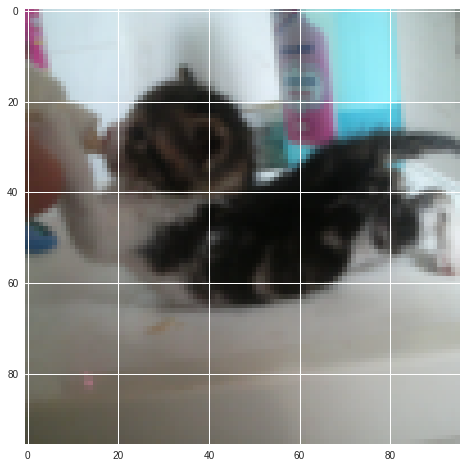

In [0]:
imgs = next(iter(real_data_loader))
plt.figure()
plt.imshow(np.transpose(imgs[0][0].numpy(), (1, 2, 0)))
plt.show()

In [0]:
model=Net().cuda()

In [0]:
criterion = nn.MSELoss().cuda()
optimizer = optim.Adam(model.parameters(), lr=1e-3, betas=(0.9, 0.999), eps=1e-8)
model_vgg = models.vgg16(pretrained=True).cuda()

In [0]:

#removing last layer of vgg
removed = list(model_vgg.children())[:-1]
model_vgg = torch.nn.Sequential(*removed).cuda()

model.load_state_dict(torch.load('data/My Drive/CV proj imagenet/mod.pt'))

In [0]:
def train(num_epochs,real_dataset,sketch_dataset,model):
  for epoch in range(num_epochs):
      total_loss = 0
      real_iter = iter(real_dataset)
      sketch_iter = iter(sketch_dataset) 
      for i, _ in enumerate(sketch_data_loader):
          real_img = next(real_iter)[0]
          reals = real_img.unsqueeze(0).cuda()
          sketch_img = next(sketch_iter)[0]
          sketches = sketch_img.unsqueeze(0).cuda()

          model.zero_grad()
          outs = model(sketches)

          with torch.no_grad():
              vgg_reals = model_vgg(reals)

          loss = criterion(outs, reals) + criterion(model_vgg(outs), vgg_reals)

          variation_loss = 0.00001 * (
                  torch.sum(torch.abs(outs[:, :, :, :-1] - outs[:, :, :, 1:])) + 
                  torch.sum(torch.abs(outs[:, :, :-1, :] - outs[:, :, 1:, :]))
              )

          loss += variation_loss
          loss.backward()
          total_loss += loss
          optimizer.step()
      if (epoch+1)%3==0:
        torch.save(model.state_dict(), 'data/My Drive/CV proj imagenet/mod.pt')
      print("Epoch", epoch, "Loss:", total_loss.data)

In [0]:
train(8000,real_dataset,sketch_dataset,model)

Epoch 919 Loss: tensor(3.9521, device='cuda:0')


KeyboardInterrupt: ignored

In [0]:
#iterators for the purpose of visualizing for well our model does
real_iter = iter(real_dataset)
sketch_iter = iter(sketch_dataset)

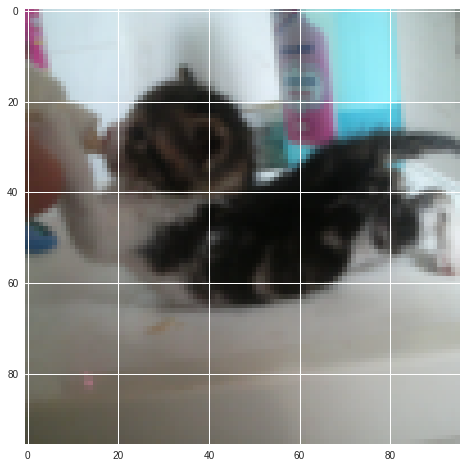

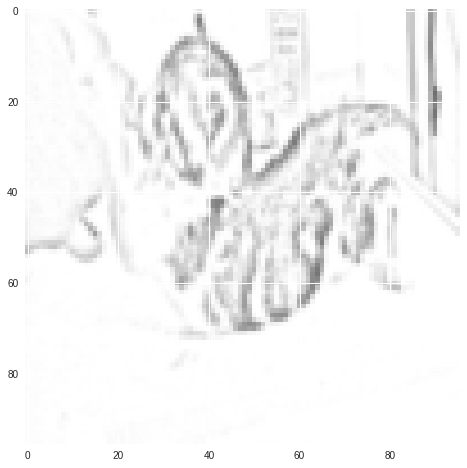

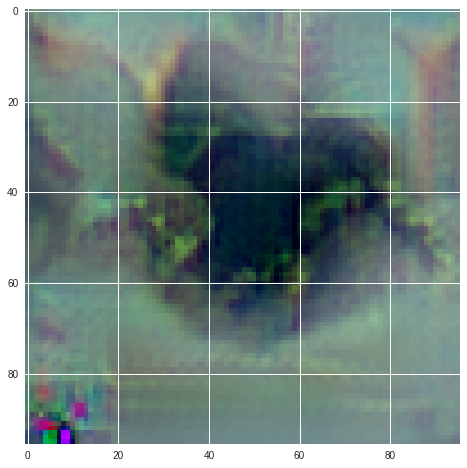

In [0]:
real_img = next(real_iter)[0]
sketch_img = next(sketch_iter)[0]
model.load_state_dict(torch.load('data/My Drive/CV proj imagenet/mod.pt'))
cuda_img = sketch_img.unsqueeze(0).cuda()
out = model(cuda_img)

#real image
plt.figure()
plt.imshow(np.transpose(real_img, (1, 2, 0)))
plt.show()

#sketch image
plt.figure()
plt.imshow(np.transpose(sketch_img, (1, 2, 0)))
plt.show()

#generated image
plt.figure()
plt.imshow(np.transpose(out[0].clamp_(0,1).detach().cpu().numpy(), (1, 2, 0)))
plt.show()


In [0]:
torch.save(model.state_dict(), 'data/My Drive/MS/CV/mod.pt')
